In [1]:
import pandas as pd

## Load Dataset

In [7]:
train = pd.read_csv('data/train.csv')

# len(train['Category'].unique()) -> 39 종류의 범죄들
# Descript 컬럼은 test컬럼에 없고 feature로 사용하기 애매
# DayOfWeek가 있어서 월화수목금 컬럼을 만들 필요가 x
# PdDistrict : 어떤 경찰서 관할인지 확인하는 컬럼
# Resolution : 해결 여부 나타내는 정보 : 분석할 때 참고자료로
# Address : 범죄가 발생했던 장소의 주소를 나타냄 : San Francisco 주소 체계가 익숙하다면(Domain knows) 얻을게 많음
# (경진대회 참석 전, 미국의 주소체계나 샌프란시스코의 주소에 대한 사전 조사를 한다면 이득이 될듯)
# X, Y : 위도, 경도(좌표 컬럼)
# 특정 위치, 좌표 등을 활용하여 특정 시간대에 특정 관할 경찰서에 발생한 범죄가 39종류의 범죄중 '어떤 범죄인지' 맞추기

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [8]:
# 숙련된 Data scientist는 바로 machine learning모델에 넣지 않는다 : EDA(Explorary Data Analysis)
# (점수가 왜 오르고 내리는거에 대한 설명을 할 수가 없다)
# 사전에 충분히 데이터를 분석하는 과정이 필요(기간상으론 : 2 ~ 7일 정도)
# 이 분석이 제대로 이뤄지지 않으면 바로 데이터를 사용하지 않는다.

## Explore

In [14]:
# Data Visualization
# 시각화를 출력하는 옵션 : 파일로 저장하지 않고 jupyter notebook에 바로 띄워서 볼 것임. 아래와 같이 작성
# 전부 분석하지 않고 일부 feature의 예를 들어서 설명할 것임 : 스스로 실습할 수 있도록 하려고
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Dates

In [19]:
# dtype('O') : string or object를 뜻함
# daytime으로 바꿔야 함(시간으로서 제대로 사용할라면)
train["Dates"].dtypes
train["Dates"] = pd.to_datetime(train["Dates"])

In [25]:
# 이렇게 daytime을 적용하게 되면 dt.time 연산이 가능해진다
# print(train["Dates"].dt.year)
# print(train["Dates"].dt.month)

# 이를 바탕으로 시간 컬럼을 몇개 추가해봅니다
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train.head()

(878049, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


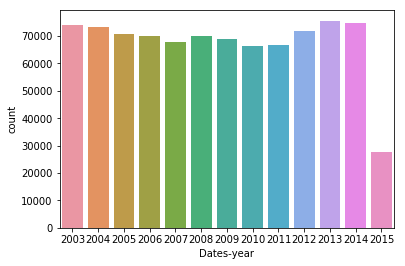

In [26]:
# 시각화
# 연월일 시분초마다 범죄발생률
# 하나하나 시각화했을 때 단점 : 스크롤의 불편함
sns.countplot(data = train, x = "Dates-year")

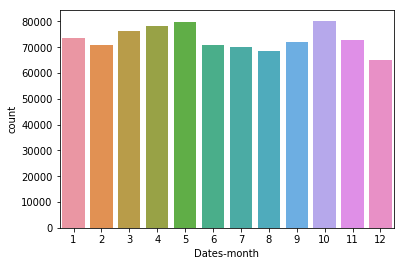

In [27]:
sns.countplot(data = train, x = "Dates-month")

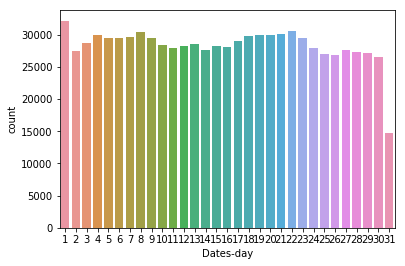

In [28]:
sns.countplot(data = train, x = "Dates-day")

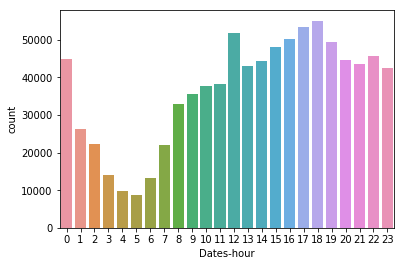

In [29]:
sns.countplot(data = train, x = "Dates-hour")

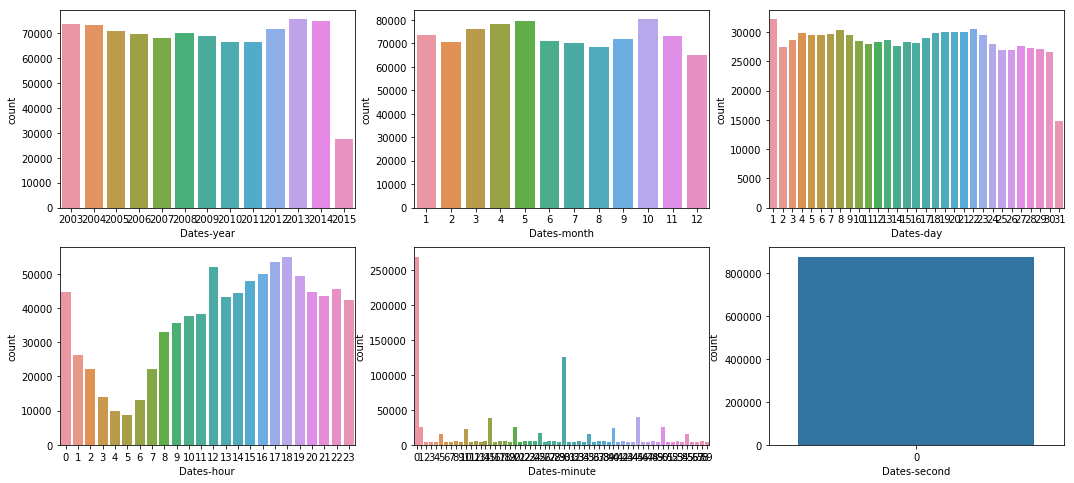

In [35]:
# 여러개의 시각화를 한 화면에 볼 수 있도록 합니다
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)

# 결과 크기를 조정하기
figure.set_size_inches(18, 8)

# 시각화 팁 : 결과를 출력하기 전에는, 그 결과가 어떻게 나올건지 '상상' 하고 비교대조하면서 분석하라(Insight 얻는 팁)
# 연도별 범죄율 : 연도에 따른 범죄율은 크게 관계 없을 듯 싶다. (이런 식으로), 왜 2015년에 반으로 줄었을까 ?
# 분석을 바탕으로 Machine Learning 알고리즘 모델에 어떻게 개선을 시킬 수 있을까 고민을 해보는 것이 좋다
# (Machine Learning 모델은 어떻게 판단 내릴 것인가 ?)
# Dates-month는 큰 변화를 느낄 수 없다
# Dates-day 또한 특이점이 보인다 : 왜 그런지 상상해봐라(year와 같이 쉬운 문제임)
# Dates-hour : 새벽에 범인은 자아햐니까 덜 발생할듯... 12시와 0시에 왜 눈에띄는 증가를 보여줄까 ?(고민필요)
# Dates-minute : 솔직히 범죄가 일어나는데 몇분인게 중요할까 ? 그걸 배제해도 시각화 결과는 특이함
# Dates-second : 잘 기록이 되지 않는 듯 하다
# 1) 이러한 현상에 ML 모델에 어떻게 반영 될 것인가
# 2) 긍정적 영향인가 부정적 영향인가
# 3) 부정적으로 영향 미친다면 어떻게 해결할 것인가?
# 4) 범죄발생 빈도보다 중요한 것은 ?
# 5) 각종 범죄의 종류마다 데이터의 변동 사항은 ?
sns.countplot(data = train, x = "Dates-year", ax = ax1)
sns.countplot(data = train, x = "Dates-month", ax = ax2)
sns.countplot(data = train, x = "Dates-day", ax = ax3)
sns.countplot(data = train, x = "Dates-hour", ax = ax4)
sns.countplot(data = train, x = "Dates-minute", ax = ax5)
sns.countplot(data = train, x = "Dates-second", ax = ax6)

### X, Y

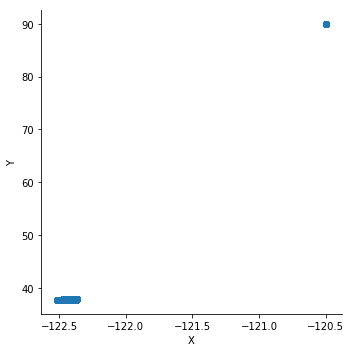

In [41]:
# 범죄가 어디서 발생했는지 보여주는 데이터
# train[["X", "Y"]]
# 왠지 시각화의 지도가 '샌프란시스코 지도의 모양과 '유사하게' 나오지 않을까 예상
# 전반적으로 좌하단과 우 상단에 몰려있는 것을 확인
# 이럴경우 좌 하단과 우 상단 둘중 하나는 아웃라이어(Outlier, 이상점)일 가능성이 높다.
sns.lmplot(data = train, x = "X", y = "Y", fit_reg = False) # 추세선을 그리지 않겠다(데이터가 너무 많아 추세선을 그릴려면 오래걸림)

In [43]:
# 정수형으로 떨어지면 위도와 경도 값이 '특이한' 것임
train["X"].max(), train["Y"].max()

(-120.5, 90.0)

In [48]:
X_outliers = (train["X"] == train["X"].max())
Y_outliers = (train["Y"] == train["Y"].max())

outlier = train[X_outliers & Y_outliers]

# 87만개의 데이터 중에서 outlier가 67개 밖에 없다 ? : 이 데이터를 처리하는데 크게 효용성이 떨어짐(후순위로 미뤄짐)
# 저 데이터에서 Address와 실제 X,Y 좌표의 값이 지도상에서 일치한다면 ? : Outlier가 아니다
# 구글맵에서 Address를 통해 검색하는거 잘 참조할 것
# X,Y 값과 실제 주소의 X,Y값의 불일치가 잦다 : outlier일 가능성이 높다!
print(outlier.shape)
outlier

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0,2005,11,28,16,4,0
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0,2005,11,14,9,20,0
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0,2005,11,2,20,30,0
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,2005,10,23,20,0,0
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,2005,10,23,18,11,0


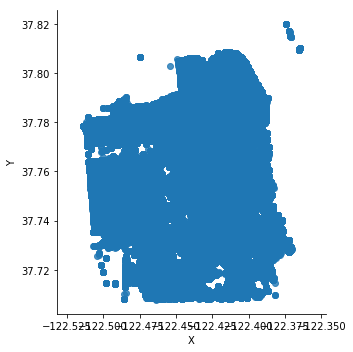

In [51]:
# outlier를 뺀 나머지를 찾아라
# 그리고 다시 시각화 해봅니다(실제로 우리가 골라낸 것이 outlier가 맞다는 것을 확인)
non_outliers = train[~(X_outliers & Y_outliers)]
sns.lmplot(data = non_outliers, x = "X", y = "Y", fit_reg = False)